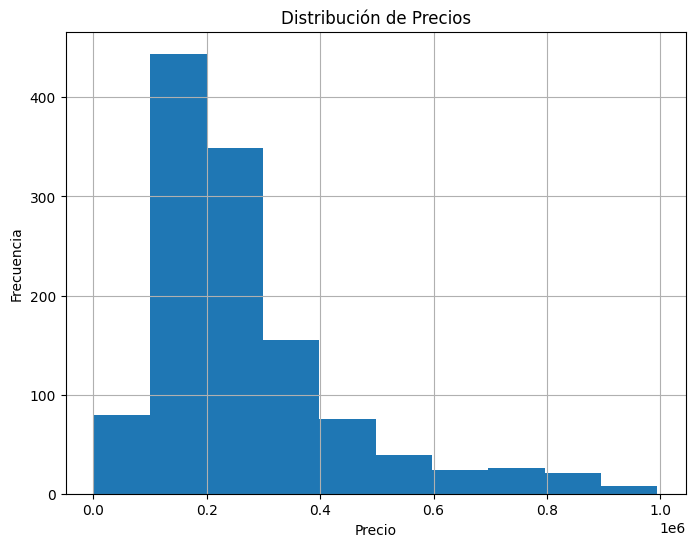

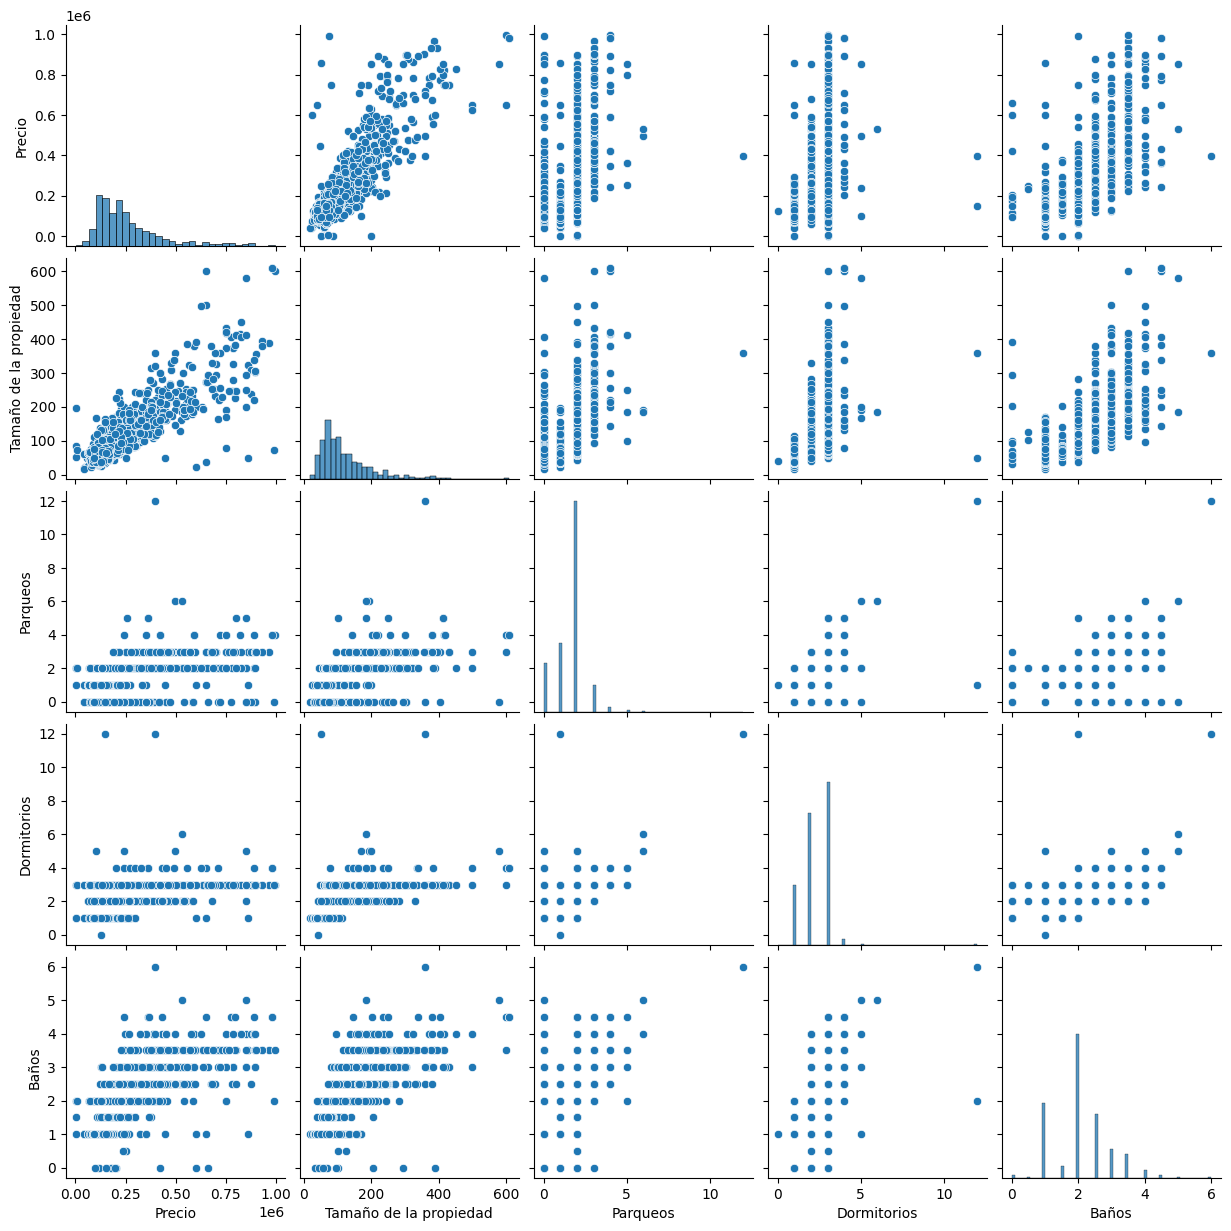

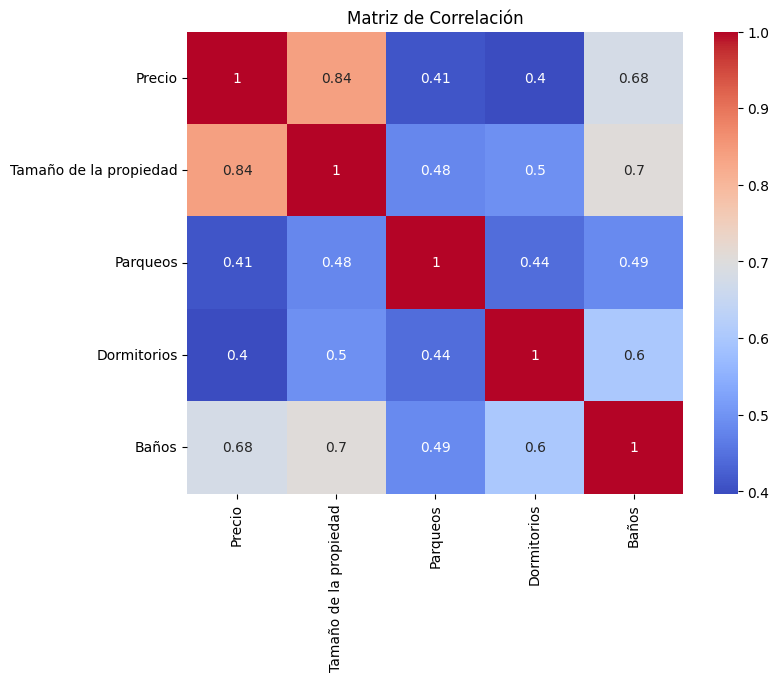

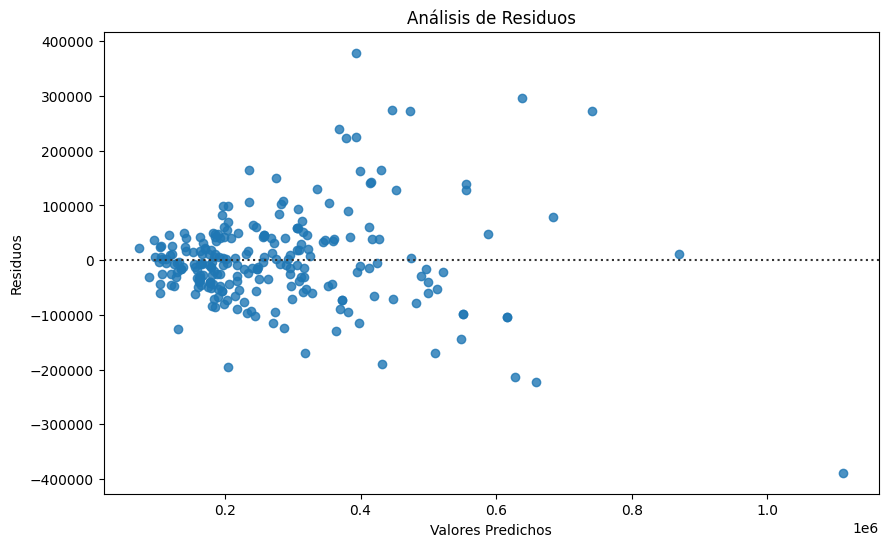

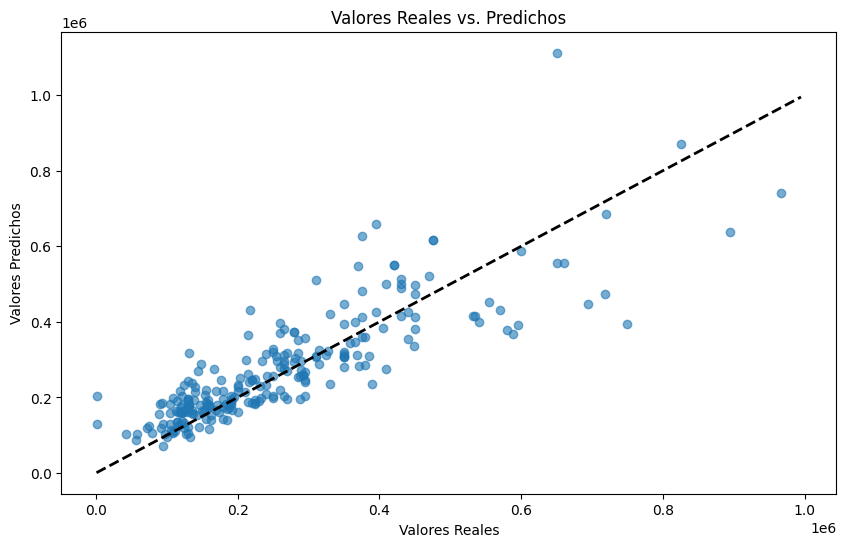

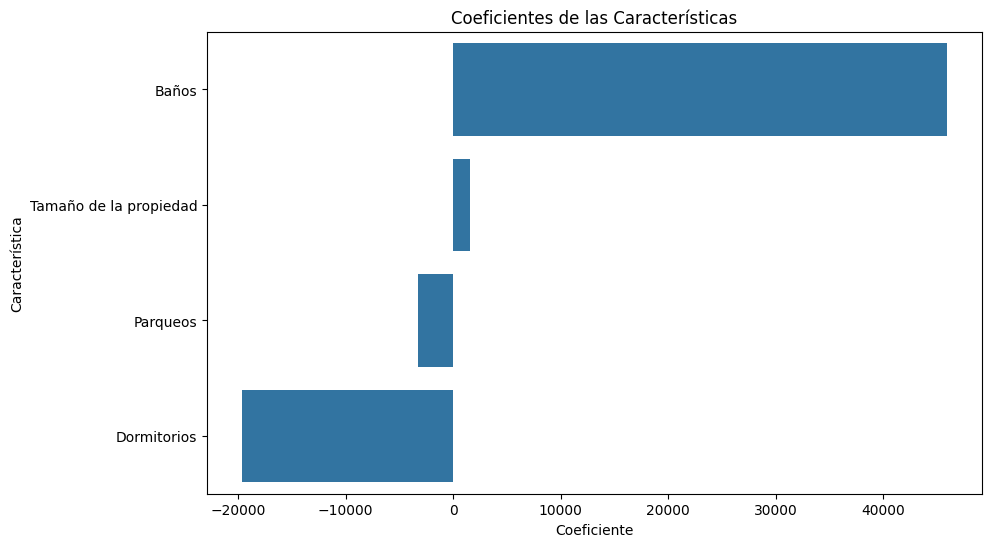

Intercepto: 22940.60
Tamaño de la propiedad: 1617.93
Parqueos: -3278.10
Dormitorios: -19612.18
Baños: 45929.19
R²: 0.70
MSE: 7637182951.16


In [ ]:
# Experimento 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargamos los datos
data = pd.read_csv('nuevo_apartamentos_selenium.csv')

# Limpiamos la columna de 'Precio'
data['Precio'] = data['Precio'].replace(',', '', regex=True).astype(float)

# Visualización inicial de la distribución de precios
plt.figure(figsize=(8, 6))
data['Precio'].hist()
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de la relación entre variables
sns.pairplot(data)
plt.show()

# Mapa de correlación
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Preparación de variables independientes y dependientes
X = data.drop('Precio', axis=1)
y = data['Precio']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


# Análisis de residuos sin 'lowess'
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test, lowess=False, line_kws={'color': 'red'})
plt.title('Análisis de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

# Comparación de valores reales vs predichos
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.show()

# Visualización de los coeficientes
coefficients = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Característica', data=coefficients)
plt.title('Coeficientes de las Características')
plt.show()

# Coeficientes del modelo
print(f'Intercepto: {model.intercept_:.2f}')
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature.capitalize()}: {coef:.2f}")

# Predicción y cálculo de métricas
y_pred = model.predict(X_test)
print(f'R²: {r2_score(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')

## Análisis Experimento 1
### Distribución de Precios
#### **Visualización del Histograma:** Observamos una distribución que podría ser sesgada hacia la izquierda, indicando una concentración de apartamentos en el rango de precios más bajo. Esto podría reflejar un mercado donde predominan las propiedades asequibles, o donde hay una oferta considerable de apartamentos económicos en comparación con los de lujo.

### **Análisis de la Relación entre Variables**
#### Al mirar las gráficas individuales, no se observa una relación lineal clara entre las variables como 'Tamaño de la propiedad', 'Baños', 'Dormitorios', y 'Precio'. Esto podría indicar que la influencia de estas variables sobre el precio no es directamente proporcional o que hay otros factores que también afectan el precio, requiriendo posiblemente modelos no lineales o la inclusión de variables categóricas como la ubicación o el año de construcción.

#### **Correlaciones Numéricas:** Al analizar el mapa de correlación generado, podemos observar que no hay correlaciones extremadamente altas que sugieran una multicolinealidad problemática, lo que es positivo para el análisis de regresión. Sin embargo, las correlaciones moderadas que podrían aparecer indicarían interacciones potenciales que podrían explorarse más detalladamente en modelos de regresión.

#### **Coeficientes de Correlación:** Las correlaciones más altas, si las hubiera entre 'Precio' y variables como 'Tamaño de la propiedad' o 'Baños', nos indicarían que estas características tienen un impacto más directo en el precio. Sin valores numéricos específicos dados aquí, una hipotética correlación de 0.5 o mayor sería notable y digna de exploración adicional.

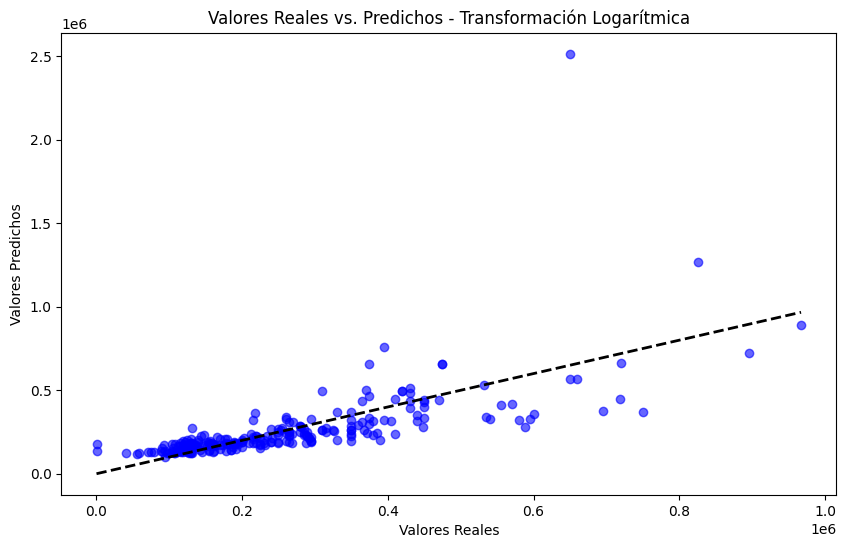

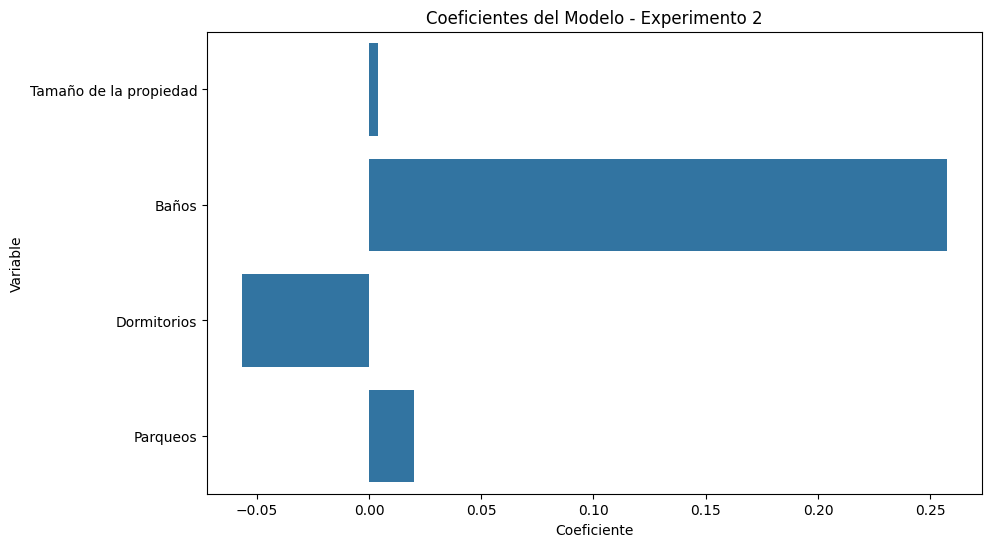

R² para el Experimento 2: 0.11
MSE para el Experimento 2: 22909828487.94
Intercepto: 87929.54
Tamaño de la propiedad: 0.00
Baños: 0.26
Dormitorios: -0.06
Parqueos: 0.02
R²: 0.11
MSE: 22909828487.94


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Asegúrate de que 'data' está cargado y preparado con 'Log_Precio'
X = data[['Tamaño de la propiedad', 'Baños', 'Dormitorios', 'Parqueos']]
y = np.log(data['Precio'])  # Usar logaritmo de 'Precio'

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en la escala logarítmica
y_pred_log = model.predict(X_test)

# Aplicar la transformación exponencial para volver a la escala original
y_pred_exp = np.exp(y_pred_log)  # Definiendo y_pred_exp

# Ahora sí, graficar
plt.figure(figsize=(10,6))
plt.scatter(np.exp(y_test), y_pred_exp, alpha=0.6, color='blue')
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos - Transformación Logarítmica')
plt.show()

# Gráfico de barras para los coeficientes del modelo
coefficients_exp2 = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Variable', data=coefficients_exp2)
plt.title('Coeficientes del Modelo - Experimento 2')
plt.show()

# Calculo del R^2 y MSE
r2_exp2 = r2_score(np.exp(y_test), y_pred_exp)
mse_exp2 = mean_squared_error(np.exp(y_test), y_pred_exp)

print(f'R² para el Experimento 2: {r2_exp2:.2f}')
print(f'MSE para el Experimento 2: {mse_exp2:.2f}')
# Asumiendo que 'model' y 'y_pred_log' ya están definidos como se hizo anteriormente
r2_exp2 = r2_score(np.exp(y_test), y_pred_exp)
mse_exp2 = mean_squared_error(np.exp(y_test), y_pred_exp)

# Detalles del modelo
print(f'Intercepto: {np.exp(model.intercept_):.2f}')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef:.2f}')

print(f'R²: {r2_exp2:.2f}')
print(f'MSE: {mse_exp2:.2f}')




## Experimento 2

### Análisis:

#### El uso del logaritmo para el precio en la regresión ayudó a normalizar la distribución de esta variable, pero el R² de 0.11 sugiere que el modelo no explica una gran parte de la variabilidad en los precios de los apartamentos, lo que es visible en la dispersión considerable en el gráfico de Valores Reales vs. Predichos.

#### El **MSE de 22,909,828,487.94** es extremadamente alto, lo que indica que las predicciones del modelo pueden estar muy alejadas de los valores reales, reflejado también en la gran dispersión en el gráfico de valores reales contra predichos.

#### El modelo no parece capturar todas las dinámicas y patrones necesarios para una predicción precisa, lo que podría ser debido a la no inclusión de variables importantes o interacciones no lineales no capturadas por el modelo lineal.

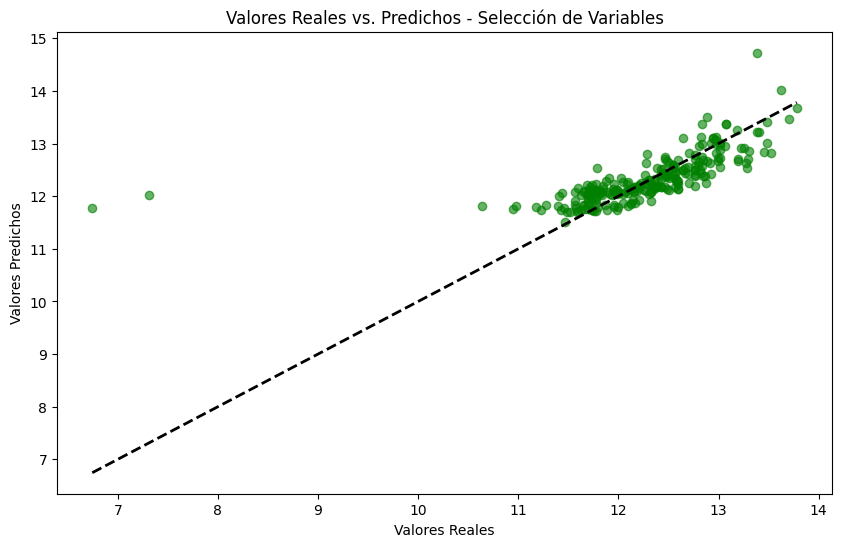

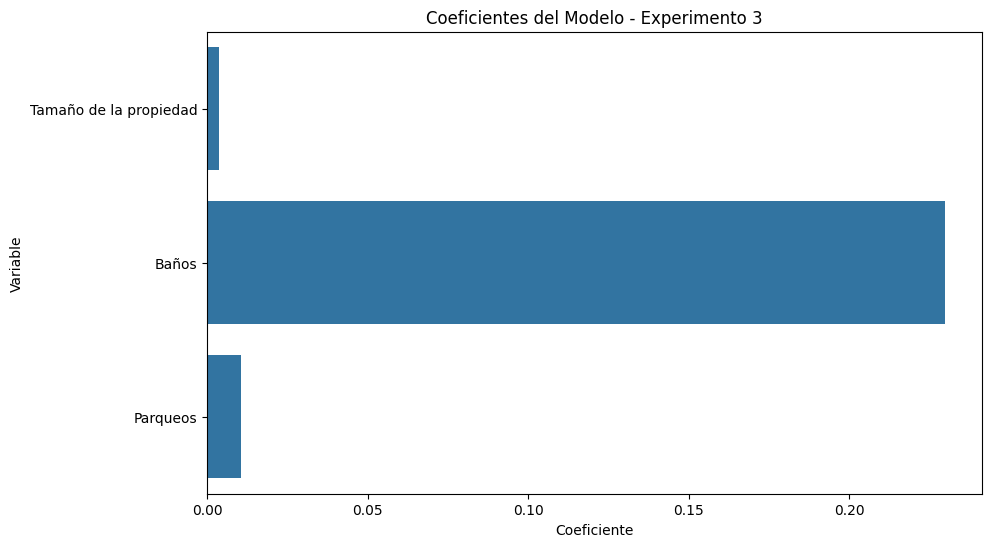

Intercepto: 11.33
Tamaño de la propiedad: 0.00
Baños: 0.23
Parqueos: 0.01
R²: 0.46
MSE: 0.30


C:\Users\luisp\AppData\Local\Temp\ipykernel_27436\314754781.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Intercepto: {model_reduced.params[0]:.2f}')


In [44]:
import statsmodels.api as sm

# Asumiendo que X_train, X_test, y_train, y_test ya están definidos y adecuados
X_train_reduced = sm.add_constant(X_train.drop(['Dormitorios'], axis=1))
model_reduced = sm.OLS(y_train, X_train_reduced).fit()

# Preparar X_test reducido
X_test_reduced = sm.add_constant(X_test.drop(['Dormitorios'], axis=1))

# Predicciones con el modelo reducido
y_pred_reduced = model_reduced.predict(X_test_reduced)  # Definiendo y_pred_reduced

# Graficar
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_reduced, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos - Selección de Variables')
plt.show()

# Asumiendo que 'model_reduced' y 'y_pred_reduced' ya están definidos como se hizo anteriormente
r2_exp3 = r2_score(y_test, y_pred_reduced)
mse_exp3 = mean_squared_error(y_test, y_pred_reduced)


# Gráfico de barras para los coeficientes del modelo reducido
coefficients_exp3 = pd.DataFrame({
    'Variable': X_train_reduced.columns[1:],  # Excluyendo la constante
    'Coeficiente': model_reduced.params[1:]   # Excluyendo el intercepto
})
plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Variable', data=coefficients_exp3)
plt.title('Coeficientes del Modelo - Experimento 3')
plt.show()

# Detalles del modelo reducido
print(f'Intercepto: {model_reduced.params[0]:.2f}')
for feature, coef in zip(X_train_reduced.columns[1:], model_reduced.params[1:]):  # excluyendo el intercepto
    print(f'{feature}: {coef:.2f}')

print(f'R²: {r2_exp3:.2f}')
print(f'MSE: {mse_exp3:.2f}')

## Experimento 3

### Análisis:

#### El modelo con variables reducidas muestra un R² de 0.46, lo que indica que, a pesar de usar menos variables, este modelo puede explicar casi la mitad de la variabilidad en los precios de los apartamentos, lo cual es un resultado significativamente mejor comparado con el segundo experimento.

#### El MSE de 0.30 es sustancialmente más bajo, lo que indica que los errores entre los valores predichos y los reales son menores, lo que también se observa en la menor dispersión en el gráfico de Valores Reales vs. Predichos.

#### La selección de variables parece ser más efectiva en este modelo, donde características como el número de baños y parqueos tienen influencias positivas y significativas en el precio, mientras que el tamaño de la propiedad tiene un efecto neutral.

## ¿Cuál es el mejor experimento?

#### El Experimento 3 es claramente superior, con el mayor R² de los tres, indicando que, a pesar de la simplicidad y la reducción en el número de variables utilizadas, este modelo es el que mejor explica la variabilidad en los precios de los apartamentos. Esto sugiere que un enfoque más dirigido y una selección cuidadosa de variables pueden ser más efectivos que simplemente incluir más variables o transformaciones básicas sin considerar la relación subyacente entre las características y el precio.